In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import h5py

import pynbody
from pynbody.analysis import profile

In [2]:
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams['font.size']=10

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rc('text', usetex=True)

ALPHA=0.8

FIG_HEIGHT = 8.5
FIG_WIDTH = 8.5

FIGSIZE=[FIG_WIDTH,FIG_HEIGHT]
DPI=300

In [3]:
data_path = "/home/ryan/Data/"
base_paty = data_path

In [4]:
def render_stars(run, ax):
    f = pynbody.load(data_path + f'/{run}/snap_007.hdf5')
    h = f.halos(subhalos=True)

    f.physical_units()

    pynbody.analysis.faceon(h[0])

    plt.sca(ax)

    pynbody.plot.stars.render(f.st, width="3 Mpc", mag_range=[18, 26])

In [5]:
def plot_dm(run, ax):
    f = pynbody.load(data_path + f'/{run}/snap_007.hdf5')
    h = f.halos(subhalos=True)

    f.physical_units()

    pynbody.analysis.center(h[0])

    pynbody.plot.image(f.dm, width="3 Mpc", units="Msol kpc^-2", cmap="viridis", axes=ax, show_cbar=False)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

def plot_gas(run, ax):
    f = pynbody.load(data_path + f'/{run}/snap_007.hdf5')
    h = f.halos(subhalos=True)

    f.physical_units()

    pynbody.analysis.center(h[0])

    pynbody.plot.image(f.gas, width="3 Mpc", units="Msol kpc^-2", cmap="bone", axes=ax, show_cbar=False)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

In [7]:
outpath = '../../../plots/plots_L3N256/particle-grid/'

try:
    os.mkdir(outpath)
except:
    print(f'{outpath} already exists!')

../../../plots/plots_L3N256/particle-grid/ already exists!


/home/ryan/miniconda3/envs/work/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:787: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


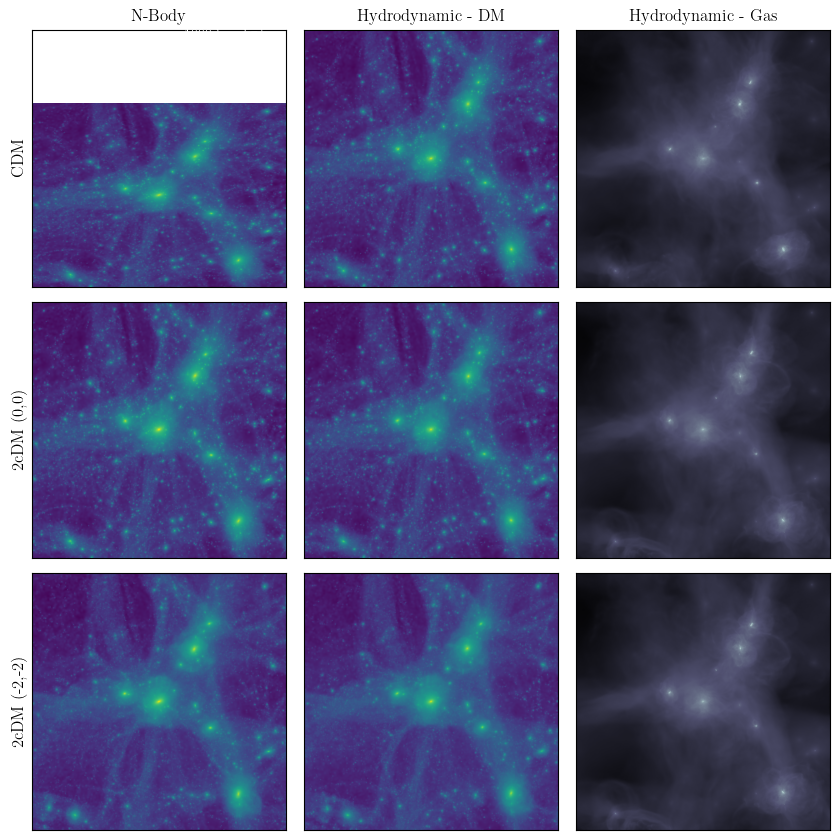

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=FIGSIZE)

plot_dm('run_CDM_L3N256_DM', ax[0,0])
ax[0,0].set_ylabel("CDM", size='large')
ax[0,0].set_title("N-Body")

plot_dm('run_CDM_L3N256_HY', ax[0,1])
ax[0,1].set_title("Hydrodynamic - DM")

plot_gas('run_CDM_L3N256_HY', ax[0,2])
ax[0,2].set_title("Hydrodynamic - Gas")

plot_dm('run_2cDM_L3N256_DM_power00_sigma1', ax[1,0])
ax[1,0].set_ylabel("2cDM (0,0)", size='large')

plot_dm('run_2cDM_L3N256_HY_power00_sigma1', ax[1,1])

plot_gas('run_2cDM_L3N256_HY_power00_sigma1', ax[1,2])

plot_dm('run_2cDM_L3N256_DM_powerm2m2_sigma1', ax[2,0])
ax[2,0].set_ylabel("2cDM (-2,-2)", size='large')

plot_dm('run_2cDM_L3N256_HY_powerm2m2_sigma1', ax[2,1])

plot_gas('run_2cDM_L3N256_HY_power00_sigma1', ax[2,2])

for a in ax.flat:
    a.set_aspect( 'auto', adjustable='box' )


ax[0,0].hlines(2500 - 1500, 250 - 1500, 1250 - 1500, color='w', linewidth=2)
ax[0,0].text(300 - 1500,  2550 - 1500, '$1000$ kpc $h^{-1}$', color='w')

fig.tight_layout()

plt.savefig(outpath + 'L3N256-particles-grid-pynbody.pdf', dpi=DPI)
plt.show()